In [50]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [51]:
src_path = '../DataBook/assignment2_submissions/'
file_name = 'assignment2-20.submit'
src_path += file_name

In [52]:
with open(src_path, 'r') as assignmentFile:
    json_data = json.load(assignmentFile)
    log_field = json_data['submission']['logs'][0]['log']

In [53]:
# Split the log_field into individual JSON objects
logs = log_field.strip().split('\n')

# Create an empty list to hold dictionaries for each log entry
log_list = []

# Iterate over each log entry and append the data to the list
for log in logs:
    data = json.loads(log)
    log_list.append(data)

In [54]:
df = pd.DataFrame(log_list)

In [59]:
df

,t,u,v,_courseId,_assignmentId,^,_#
0,1707162767540,0.0,,CS 196 - Computer Programming II,Assignment 2 - Dunder Methods,NaN,NaN
1,1707776559674,0.0,NaN,NaN,NaN,"[0, 0, \r\n]",NaN
2,1707776579238,0.0,X,NaN,NaN,NaN,NaN
3,1707776580210,0.0,NaN,NaN,NaN,"[0, 1, ]",NaN
4,1707776580685,0.0,NaN,NaN,NaN,"[0, 0, C]",NaN
...,...,...,...,...,...,...,...
1794,1707777727772,3.0,NaN,NaN,NaN,"[219, 0, h]",NaN
1795,1707777727902,3.0,NaN,NaN,NaN,"[220, 0, o]",NaN
1796,1707777728389,3.0,NaN,NaN,NaN,"[221, 0, d]",NaN
1797,1707777728580,3.0,NaN,NaN,NaN,"[222, 0, s]",NaN


In [58]:
not_nan_values = df['v'].dropna()
not_nan_values

0                                                        
2                                                       X
32                                                       
33                                                       
34                                                       
35                                                      x
487                              Creating a library class
488     class Library:\r\n    """ Class to represent l...
1087                                                     
1088                                                    l
1552    class Library:\r\n    """ Class to represent l...
1553    # Creating a library and adding books\r\nlibra...
1554                                                     
1556    class Library:\r\n    """ Class to represent l...
1613    class Library:\r\n    """ Class to represent l...
1614                                                     
1616    class Library:\r\n    """ Class to represent l...
1738    class 

In [56]:
# time_chars_dict = {}

# # Processing the DataFrame skipping the first entry
# for timestamp, total_chars, cursor_position in zip(df['t'][1:], df['_cs'].fillna(method='ffill')[1:], df['_c'].fillna(method='ffill')[1:]):
#     if timestamp not in time_chars_dict:
#         time_chars_dict[timestamp] = {'total_chars': [], 'cursor_position': []}
#     time_chars_dict[timestamp]['total_chars'].append(total_chars)
#     time_chars_dict[timestamp]['cursor_position'].append(cursor_position)

# # Saving the dictionary as a JSON file
# output_file = "./DataSet/" + file_name.replace('.submit', '.json')
# with open(output_file, 'w') as f:
#     json.dump(time_chars_dict, f)

# print(f"Dictionary saved to {output_file}")


In [57]:
# Plotting total_chars_in_file over time
plt.plot(df['t'], df['_cs'].fillna(method='ffill'))
plt.title("Total Chars in File Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")
plt.show()

KeyError: '_cs'

C:\Users\K-Gen\AppData\Local\Temp\ipykernel_15228\3970496429.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])
C:\Users\K-Gen\AppData\Local\Temp\ipykernel_15228\3970496429.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(df['t'], df['_cs'].fillna(method='ffill'), color='blue')


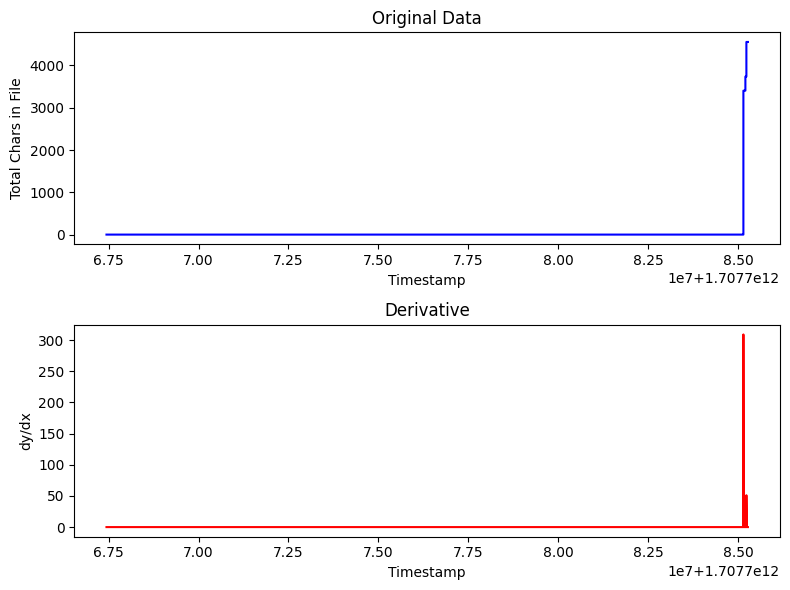

In [ ]:
dy_dx = np.gradient(df['_cs'].fillna(method='ffill'), df['t'])

# Plotting the data
plt.figure(figsize=(8, 6))

# Original data
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['_cs'].fillna(method='ffill'), color='blue')
plt.title("Original Data")
plt.xlabel("Timestamp")
plt.ylabel("Total Chars in File")

# Derivative data
plt.subplot(2, 1, 2)
plt.plot(df['t'], dy_dx, color='red')
plt.title("Derivative")
plt.xlabel("Timestamp")
plt.ylabel("dy/dx")

plt.tight_layout()
plt.show()